In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
train_csv = "C:/Users/Shruthi/Desktop/classes-students/projects1234/project_2/datasets/train.csv"
train = pd.read_csv(train_csv)

In [3]:
df = train[["Overall Qual", "Total Bsmt SF","1st Flr SF","Gr Liv Area", "Garage Cars", "Garage Area", "Garage Yr Blt","TotRms AbvGrd","Full Bath" , "Mas Vnr Area", "Year Remod/Add" ,"Year Built","SalePrice","2nd Flr SF","Bsmt Unf SF"]]

In [4]:
df = df[df["Overall Qual"]>=2]

In [5]:
df = df[df["1st Flr SF"]<= 3000]

In [6]:
df = df[df["Gr Liv Area"]<= 4000]

In [7]:
df = df[df["Garage Yr Blt"]<= 2019]


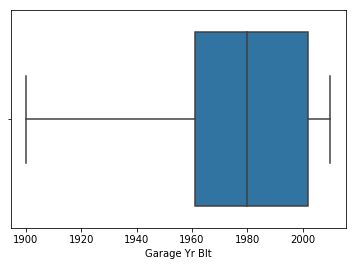

In [8]:
df = df[df["Garage Yr Blt"]>= 1900]
sns.boxplot(x=df["Garage Yr Blt"])

In [9]:
df = df[df["Mas Vnr Area"]<= 1000]

In [10]:
df = df[df["Year Built"]>= 1890]

In [11]:
df = df[df["Gr Liv Area"]<= 4000]

In [12]:
#Feature Engineering
df["House Age"] = df["Year Remod/Add"] - df["Year Built"]

In [13]:
df.dropna(subset=['Total Bsmt SF'], inplace=True)

In [14]:
df = df.drop(columns="House Age")

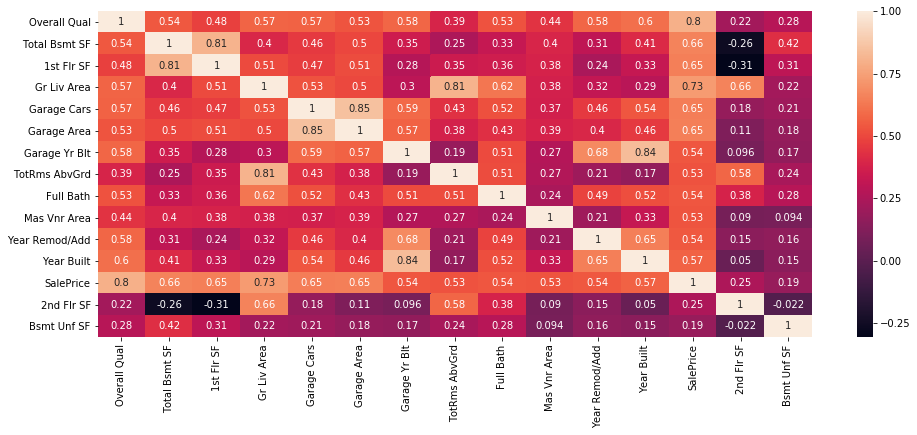

In [15]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),annot=True)

In [16]:
df["Interaction_Column1"] = df["Garage Yr Blt"]* df["Garage Yr Blt"]
df["Interaction_column2"] = df["Gr Liv Area"]*df["2nd Flr SF"]
df["Interaction_column3"] = df["Total Bsmt SF"]*df["Bsmt Unf SF"]

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
Y = df["SalePrice"]

In [19]:
df = df.drop(columns="SalePrice")

In [20]:
X_train, X_test, y_train, y_test =train_test_split(df,Y,train_size=0.75,test_size=0.25,random_state=123)


In [21]:
test_csv = "C:/Users/Shruthi/Desktop/classes-students/projects1234/project_2/datasets/test.csv"
test = pd.read_csv(test_csv)

In [22]:
test = test[["Overall Qual", "Total Bsmt SF","1st Flr SF","Gr Liv Area", "Garage Cars", "Garage Area", "Garage Yr Blt","TotRms AbvGrd","Full Bath" , "Mas Vnr Area", "Year Remod/Add" ,"Year Built","2nd Flr SF","Bsmt Unf SF"]]

In [40]:
test["Interaction_Column1"] = test["Garage Yr Blt"]* test["Garage Yr Blt"]
test["Interaction_column2"] = test["Gr Liv Area"]* test["2nd Flr SF"]
test["Interaction_column3"] = test["Total Bsmt SF"]*test["Bsmt Unf SF"]

In [41]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("score:",score)
print("cross val score:",cross_val_score(model,X_train,y_train, cv=7).mean())

score: 0.8733108004198654
cross val score: 0.8547536262585955


In [42]:
print(model.predict(X_train))

[ 76952.22151318 149052.97486642 124653.03465786 ... 188917.53458558
  99794.83856647 118421.6132527 ]


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df))
StandardScaler(copy=True, with_mean=True, with_std=True)
standardized_df = scaler.transform(df)

StandardScaler(copy=True, with_mean=True, with_std=True)


C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [44]:
X_train, X_test, y_train, y_test =train_test_split(standardized_df,Y,train_size=0.75,test_size=0.25,random_state=123)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)
score = model.score(X_test,y_test)
print("score:",score)
print("cross val score:",cross_val_score(model,X_train,y_train, cv=7).mean())

score: 0.8733108004198654
cross val score: 0.8547536262585955


In [45]:
#standardizing isn't giving a better performance

In [46]:
from sklearn.metrics import mean_squared_error


In [47]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

25343.464225380332

In [48]:
test.columns

Index(['Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Garage Cars', 'Garage Area', 'Garage Yr Blt', 'TotRms AbvGrd',
       'Full Bath', 'Mas Vnr Area', 'Year Remod/Add', 'Year Built',
       '2nd Flr SF', 'Bsmt Unf SF', 'Interaction_Column1',
       'Interaction_column2', 'Interaction_column3'],
      dtype='object')

In [49]:
test['Garage Yr Blt'].fillna(test['Year Built'], inplace=True)

In [50]:
test.isnull().sum()

Overall Qual           0
Total Bsmt SF          0
1st Flr SF             0
Gr Liv Area            0
Garage Cars            0
Garage Area            0
Garage Yr Blt          0
TotRms AbvGrd          0
Full Bath              0
Mas Vnr Area           0
Year Remod/Add         0
Year Built             0
2nd Flr SF             0
Bsmt Unf SF            0
Interaction_Column1    0
Interaction_column2    0
Interaction_column3    0
dtype: int64

In [51]:
test["Interaction_Column1"] = test["Garage Yr Blt"]* test["Year Built"]

In [52]:
test['Mas Vnr Area'].fillna(0, inplace=True)

In [53]:
predictions = model.predict(test)

In [54]:
X_train, X_test, y_train, y_test =train_test_split(df,Y,train_size=0.75,test_size=0.25,random_state=123)

In [55]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("score:",score)
print("cross val score:",cross_val_score(model,X_train,y_train, cv=7))

score: 0.8733108004198676
cross val score: [0.86709809 0.83921351 0.86093176 0.88148917 0.83880867 0.84805235
 0.84768183]


In [56]:
predictions_test = model.predict(test)

In [57]:
predictions_test = pd.DataFrame(predictions_test)

In [64]:
boom_csv = "C:/Users/Shruthi/Desktop/classes-students/projects1234/project_2/datasets/test.csv"
boom = pd.read_csv(boom_csv)

In [65]:
submission = predictions_test.join(boom["Id"], how='outer')

In [66]:
predictions_test.to_csv('predictions_test.csv',index=False)

In [67]:
submission

,0,Id
0,1.848702e+05,2658
1,1.961335e+05,2718
2,1.902093e+05,2414
3,-1.516688e+05,1989
4,1.816766e+05,625
5,7.384149e+04,333
6,7.508130e+04,1327
7,1.115677e+05,858
8,1.896468e+05,95
9,9.870340e+04,1568


In [68]:
submission = submission[['Id', 0]]

In [69]:
submission

,Id,0
0,2658,1.848702e+05
1,2718,1.961335e+05
2,2414,1.902093e+05
3,1989,-1.516688e+05
4,625,1.816766e+05
5,333,7.384149e+04
6,1327,7.508130e+04
7,858,1.115677e+05
8,95,1.896468e+05
9,1568,9.870340e+04


In [70]:
submission.to_csv('submission.csv',index=False)